# Import des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency


# Import des bases de données

In [2]:
# Chemin du fichier à importer
data = pd.read_csv(r"C:\Users\Yan HUQUET\Desktop\Equancy\data.csv",
                      delimiter=',')

In [3]:
data.head()

Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome Experience  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master          1   
1                          Python/Java/Scala/MongoDB  Master          3   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master          3   
3                                  C/C++/Java/Python  Master        1,5   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd        NaN   

       Ville  
0      Paris  
1  Marseille  
2     Nantes  
3  Marseille  
4   Bordeaux

# Question 1

In [4]:
len(data)
# Equivalent à data.shape[0]

9582

In [5]:
print("Taux de complétude de la base :\n", (data.count()/len(data)).round(4)*100)
print("\n")

Taux de complétude de la base :
 Entreprise       99.82
Metier           99.80
Technologies    100.00
Diplome         100.00
Experience       99.02
Ville           100.00
dtype: float64




In [6]:
data.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

Les variables Entreprise, Metier et Experience ont respectivement 17, 19 et 94 valeurs manquantes.

# Question 2

In [7]:
data.loc[data['Experience'].str.contains(',', na=False), 'Experience'] = data.loc[data['Experience'].str.contains(',', na=False), 'Experience'].str.replace(',','.')
data['Experience'] = data['Experience'].astype(float)

In [8]:
data.loc[(data.Experience.isnull()) & (data.Metier == 'Data scientist'), 
                 'Experience'] = data["Experience"].median()

In [9]:
data.loc[(data.Experience.isnull()) & (data.Metier == 'Data engineer'), 
                 'Experience'] = data["Experience"].mean()

In [10]:
data.loc[(data.Experience.isnull()) & (data.Metier == 'Lead data scientist'), 
                 'Experience'] = data["Experience"].median()

In [11]:
data.loc[(data.Experience.isnull()) & (data.Metier == 'Data architecte'), 
                 'Experience'] = data["Experience"].median()

# Question 3

In [12]:
filtre = data.Metier == 'Data scientist'
print("Les data scientists ont, en moyenne,", data[filtre].Experience.mean(), "années d'expérience.")

Les data scientists ont, en moyenne, 2.241267787839586 années d'expérience.


In [13]:
filtre = data.Metier == 'Lead data scientist'
print("Les lead data scientists ont, en moyenne,", data[filtre].Experience.mean(), "années d'expérience.")

Les lead data scientists ont, en moyenne, 3.9348534201954397 années d'expérience.


In [14]:
filtre = data.Metier == 'Data engineer'
print("Les data engineers ont, en moyenne,", data[filtre].Experience.mean(), "années d'expérience.")

Les data engineers ont, en moyenne, 2.983480609968742 années d'expérience.


# Question 4

Text(0.5, 1.0, "Nombre moyen d'années d'expériences pour chaque métier")

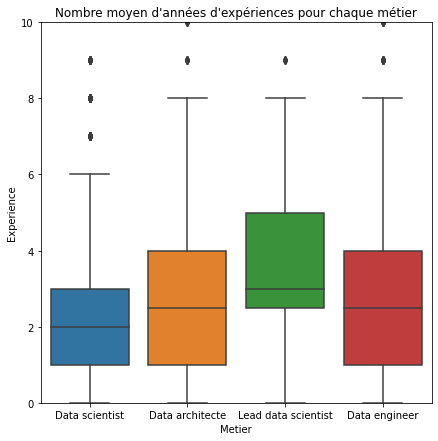

In [15]:
ax,fig = plt.subplots(figsize=(7,7))
ax = sns.boxplot(data=data, x="Metier", y="Experience")
ax.set_ylim(0,10)
ax.set_title("Nombre moyen d'années d'expériences pour chaque métier")

# Question 5

Text(0.5, 1.0, "Répartition des années d'expériences pour chaque métier")

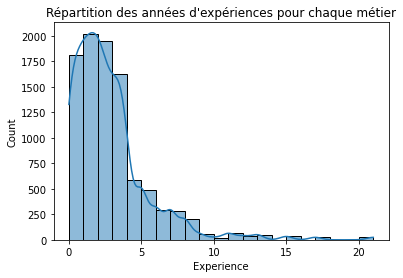

In [16]:
ax = sns.histplot(data = data, x = 'Experience', binwidth=1, kde=True)
ax.set_title("Répartition des années d'expériences pour chaque métier")

In [17]:
data.Experience.describe(percentiles = np.arange(0,1,0.05))

count    9582.000000
mean        2.807893
std         2.703874
min         0.000000
0%          0.000000
5%          0.000000
10%         0.500000
15%         0.500000
20%         1.000000
25%         1.000000
30%         1.500000
35%         1.500000
40%         1.500000
45%         2.000000
50%         2.000000
55%         2.500000
60%         2.500000
65%         3.000000
70%         3.500000
75%         3.500000
80%         4.000000
85%         5.000000
90%         6.000000
95%         8.000000
max        21.000000
Name: Experience, dtype: float64

In [18]:
data.loc[(data.Experience >= 0) & (data.Experience <= 2), 
                 'Exp_label'] = 'Débutant'
data.loc[(data.Experience > 2) & (data.Experience <= 5), 
                 'Exp_label'] = 'Confirmé'
data.loc[(data.Experience > 5) & (data.Experience <= 8), 
                 'Exp_label'] = 'Avancé'
data.loc[(data.Experience > 8) & (data.Experience <= 21), 
                 'Exp_label'] = 'Expert'

In [19]:
data.Exp_label.value_counts()/data.shape[0]

Débutant    0.509706
Confirmé    0.375287
Avancé      0.081716
Expert      0.033292
Name: Exp_label, dtype: float64

# Question 6

In [20]:
d = dict()
# on transforme la variable Technologies en liste
for _ in data.Technologies.to_list():
# on sépare les technologies utilisées puis on compte le nombre d'occurence
    for tech in _.split('/'):
        if tech in d.keys():
            d[tech] += 1
        else:
            d[tech] = 1
d1 = sorted(d.items(), key=lambda item: item[1], reverse=True)

<BarContainer object of 5 artists>

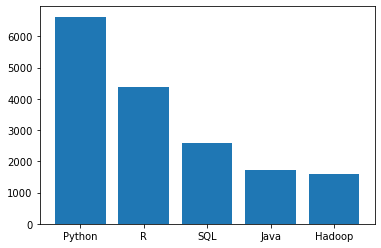

In [21]:
import matplotlib.pylab as plt

lists = sorted(d.items(), key=lambda item: item[1], reverse=True)

x, y = zip(*lists)

plt.bar(x[:5], y[:5])

# Question 7

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

In [23]:
print(d.keys())

dict_keys(['Matlab', 'Python', 'Pyspark', 'Scikit-learn', 'Tensorflow', 'Java', 'Scala', 'MongoDB', 'SPSS', 'SQL', 'Teradata', 'R', 'scikit-learn', 'C', 'C++', 'numpy', 'VBA', 'Excel', 'PySpark', 'Linux', 'Docker', 'GNU', 'Hadoop', 'Hive', 'MariaDB', 'machine learning', 'Spark', 'AWS', 'Deep learning', 'PostgreSQL', 'Elasticsearch', 'Kibana', 'HDFS', 'Yarn', 'Microsoft Azure', 'Redshift', 'SAS', 'Machine learning', 'Anglais', 'anglais', 'AI', 'Scoring', 'Perl', 'Ruby', 'Pycharm', 'Vertica', 'Tableau', '', 'Big data', 'Kafka', 'ORACLE', 'MySQL', 'Cassandra', 'NoSQL', 'Matplotlib', 'Map-Reduce', 'PIG', 'HBASE', 'Windows', 'NoSQ', 'Hadoop(HDFS)'])


In [24]:
l = []
for i in data.index:
    dico = dict()
    for j in data.iloc[i]['Technologies'].split('/') : 
        dico[j] = d[j]
    l.append(max(dico, key=dico.get))
l
data['Technologies_2'] = l

In [25]:
data.head()

Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome  Experience  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master         1.0   
1                          Python/Java/Scala/MongoDB  Master         3.0   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master         3.0   
3                                  C/C++/Java/Python  Master         1.5   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd         2.0   

       Ville Exp_label Technologies_2  
0      Paris  Débutant         Python  
1  Marseille  Confirmé         Python  
2     Nantes  Confirmé         Python  
3  Marseille  Débutant         Python  
4   Bordeaux  Débutant         Python

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in ['Entreprise', 'Diplome', 'Ville', 'Technologies_2', 'Metier']:
    y = le.fit_transform(data[col])
    data[col+"_encoded"] = y

In [27]:
data.isnull().sum()

Entreprise                17
Metier                    19
Technologies               0
Diplome                    0
Experience                 0
Ville                      0
Exp_label                  0
Technologies_2             0
Entreprise_encoded         0
Diplome_encoded            0
Ville_encoded              0
Technologies_2_encoded     0
Metier_encoded             0
dtype: int64

In [28]:
subdata = data[["Experience", "Metier_encoded", "Diplome_encoded",
     "Ville_encoded", "Technologies_2_encoded"]]

In [29]:
# Segmentation à l'aide d'une CAH

y_pred = AgglomerativeClustering().fit(subdata)

In [30]:
data["CAH"] = y_pred.labels_

In [31]:
data.CAH.value_counts()

1    4800
0    4782
Name: CAH, dtype: int64

Text(0.5, 1.0, "Nombre moyen d'années d'expériences pour chaque cluster")

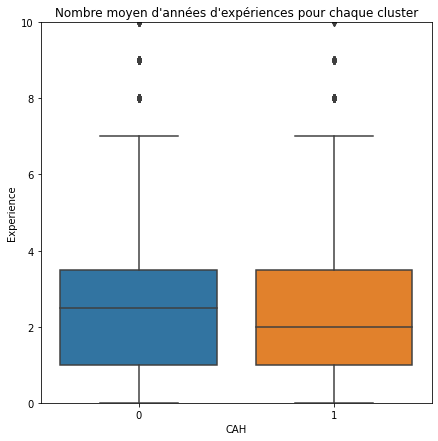

In [32]:
ax,fig = plt.subplots(figsize=(7,7))
ax = sns.boxplot(data=data, x="CAH", y="Experience")
ax.set_ylim(0,10)
ax.set_title("Nombre moyen d'années d'expériences pour chaque cluster")

Text(0.5, 1.0, "Répartition des années d'expériences pour chaque ville")

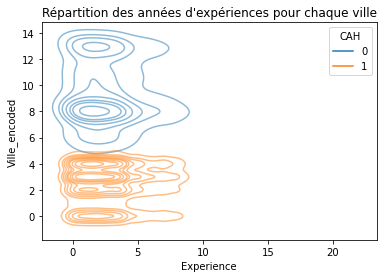

In [33]:
ax = sns.kdeplot(data = data, x = 'Experience', y = "Ville_encoded",
                 alpha = 0.5, hue = "CAH")
ax.set_title("Répartition des années d'expériences pour chaque ville")

In [34]:
ville = data[["Ville", "Ville_encoded"]].drop_duplicates()

In [35]:
ville

Ville  Ville_encoded
0          Paris              8
1      Marseille              4
2         Nantes              6
4       Bordeaux              0
5          Lille              2
7       Toulouse             13
11         Rouen             10
13          Lyon              3
35    Strasbourg             11
38      Grenoble              1
81          Nice              7
86        Toulon             12
106  Montpellier              5
122       Rennes              9

In [36]:
filtre = data.CAH == 1
data[filtre].Ville.value_counts()/data[filtre].CAH.shape[0]

Lyon           0.360000
Marseille      0.313333
Lille          0.155417
Bordeaux       0.141250
Grenoble       0.020208
Montpellier    0.008542
Nantes         0.001250
Name: Ville, dtype: float64

In [37]:
filtre = data.CAH == 0
data[filtre].Ville.value_counts()/data[filtre].CAH.shape[0]

Paris          0.421372
Toulouse       0.182141
Rennes         0.075282
Nantes         0.075073
Rouen          0.065872
Strasbourg     0.064617
Toulon         0.038896
Nice           0.038269
Lyon           0.011083
Montpellier    0.009619
Marseille      0.009201
Lille          0.005228
Bordeaux       0.002928
Grenoble       0.000418
Name: Ville, dtype: float64

In [39]:
filtre = data.CAH == 1
data[filtre].Metier.value_counts()/data[filtre].CAH.shape[0]

Data scientist         0.393542
Data engineer          0.249792
Data architecte        0.228750
Lead data scientist    0.125625
Name: Metier, dtype: float64

In [40]:
filtre = data.CAH == 0
data[filtre].Metier.value_counts()/data[filtre].CAH.shape[0]

Data scientist         0.413216
Data engineer          0.240067
Data architecte        0.214345
Lead data scientist    0.130698
Name: Metier, dtype: float64

Text(0.5, 1.0, "Répartition des années d'expériences pour chaque diplome")

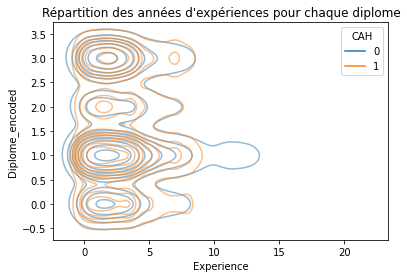

In [44]:
ax = sns.kdeplot(data = data, x = 'Experience', y = "Diplome_encoded",
                 alpha = 0.5, hue = "CAH")
ax.set_title("Répartition des années d'expériences pour chaque diplome")

In [45]:
filtre = data.CAH == 1
data[filtre].Diplome.value_counts()/data[filtre].CAH.shape[0]

Master        0.526250
Phd           0.230417
Bachelor      0.145833
No diploma    0.097500
Name: Diplome, dtype: float64

In [46]:
filtre = data.CAH == 0
data[filtre].Diplome.value_counts()/data[filtre].CAH.shape[0]

Master        0.511292
Phd           0.240903
Bachelor      0.144709
No diploma    0.103095
Name: Diplome, dtype: float64

In [50]:
filtre = data.CAH == 1
data[filtre].Technologies_2.value_counts()/data[filtre].CAH.shape[0]

Python           0.688542
Java             0.082083
R                0.065625
MongoDB          0.060417
SQL              0.050417
Hadoop           0.031875
Elasticsearch    0.021042
Name: Technologies_2, dtype: float64

In [51]:
filtre = data.CAH == 0
data[filtre].Technologies_2.value_counts()/data[filtre].CAH.shape[0]

Python           0.694688
R                0.077792
Java             0.071727
MongoDB          0.052907
SQL              0.049143
Hadoop           0.028440
Elasticsearch    0.025303
Name: Technologies_2, dtype: float64

## On modifie l'encodage des variables pour distinguer au mieux les clusters, CAH2

In [173]:
data.Ville.value_counts()

Paris          2015
Lyon           1781
Marseille      1548
Toulouse        871
Lille           771
Bordeaux        692
Nantes          365
Rennes          360
Rouen           315
Strasbourg      309
Toulon          186
Nice            183
Grenoble         99
Montpellier      87
Name: Ville, dtype: int64

In [174]:
# On sépare de la manière suivante : Paris, les deux grandes métropoles (Lyon et Marseille), 
# Toulouse et les autres villes.
l =[]
for i in data.index:
    if data.loc[i].Ville == 'Paris' :
        l.append(0)
    elif data.loc[i].Ville in ['Lyon', 'Marseille'] :
        l.append(1)
    elif data.loc[i].Ville in ['Toulouse'] :
        l.append(2)
    else :
        l.append(3)

data['Ville_encoded_2'] = l

In [175]:
l =[]
for i in data.index:
    if data.loc[i].Technologies_2 in ['Python'] :
        l.append(0)
    elif data.loc[i].Technologies_2 in ['R'] :
        l.append(1)
    elif data.loc[i].Technologies_2 in ['SQL'] :
        l.append(2)
    elif data.loc[i].Technologies_2 in ['Java'] :
        l.append(3)
    elif data.loc[i].Technologies_2 in ['Hadoop'] :
        l.append(4)
    else :
        l.append(5)

data['Technologies_encoded_2'] = l

In [176]:
subdata2 = data[
    ["Experience", "Metier_encoded", "Diplome_encoded",
     "Ville_encoded_2", "Technologies_encoded_2"]
]

In [177]:
# Segmentation à l'aide d'une CAH

y_pred = AgglomerativeClustering().fit(subdata2)

In [178]:
data["CAH2"] = y_pred.labels_

In [179]:
data.CAH2.value_counts()

0    8364
1    1218
Name: CAH2, dtype: int64

Text(0.5, 1.0, "Nombre moyen d'années d'expériences pour chaque cluster")

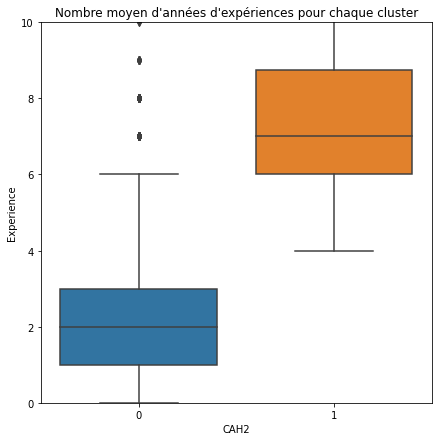

In [180]:
ax,fig = plt.subplots(figsize=(7,7))
ax = sns.boxplot(data=data, x="CAH2", y="Experience")
ax.set_ylim(0,10)
ax.set_title("Nombre moyen d'années d'expériences pour chaque cluster")

In [185]:
filtre = data.CAH2 == 1
data[filtre].Ville.value_counts()/data[filtre].CAH2.shape[0]

Paris          0.202791
Lyon           0.192118
Marseille      0.142036
Toulouse       0.096880
Lille          0.082923
Bordeaux       0.072250
Nantes         0.044335
Rouen          0.035304
Rennes         0.035304
Strasbourg     0.027094
Toulon         0.027094
Nice           0.022989
Montpellier    0.009852
Grenoble       0.009031
Name: Ville, dtype: float64

In [184]:
filtre = data.CAH2 == 0
data[filtre].Ville.value_counts()/data[filtre].CAH.shape[0]

Paris          0.211382
Lyon           0.184959
Marseille      0.164395
Toulouse       0.090029
Lille          0.080105
Bordeaux       0.072214
Rennes         0.037901
Nantes         0.037183
Strasbourg     0.032999
Rouen          0.032520
Nice           0.018532
Toulon         0.018293
Grenoble       0.010521
Montpellier    0.008967
Name: Ville, dtype: float64

In [187]:
filtre = data.CAH2 == 1
data[filtre].Technologies_2.value_counts()/data[filtre].CAH2.shape[0]

Python           0.839080
R                0.079639
Java             0.025452
SQL              0.022989
MongoDB          0.013957
Hadoop           0.012315
Elasticsearch    0.006568
Name: Technologies_2, dtype: float64

In [188]:
filtre = data.CAH2 == 0
data[filtre].Technologies_2.value_counts()/data[filtre].CAH.shape[0]

Python           0.670134
Java             0.084409
R                0.070540
MongoDB          0.062889
SQL              0.053682
Hadoop           0.032759
Elasticsearch    0.025586
Name: Technologies_2, dtype: float64

In [189]:
filtre = data.CAH2 == 1
data[filtre].Diplome.value_counts()/data[filtre].CAH2.shape[0]

Master        0.533662
Phd           0.226601
Bachelor      0.153530
No diploma    0.086207
Name: Diplome, dtype: float64

In [190]:
filtre = data.CAH2 == 0
data[filtre].Diplome.value_counts()/data[filtre].CAH.shape[0]

Master        0.516619
Phd           0.236968
Bachelor      0.144070
No diploma    0.102343
Name: Diplome, dtype: float64

In [191]:
filtre = data.CAH2 == 1
data[filtre].Metier.value_counts()/data[filtre].CAH2.shape[0]

Data scientist         0.302956
Lead data scientist    0.286535
Data engineer          0.215107
Data architecte        0.192939
Name: Metier, dtype: float64

In [192]:
filtre = data.CAH2 == 0
data[filtre].Metier.value_counts()/data[filtre].CAH.shape[0]

Data scientist         0.417982
Data engineer          0.249283
Data architecte        0.225729
Lead data scientist    0.105093
Name: Metier, dtype: float64

## CAH3

In [194]:
subdata_cramer = data[
    ["Metier_encoded", "Diplome_encoded",
     "Technologies_2_encoded", "CAH"]
]

In [195]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [196]:
rows= []

for var1 in subdata_cramer:
  col = []
  for var2 in subdata_cramer :
    cramers = cramers_V(subdata_cramer[var1], subdata_cramer[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = subdata_cramer.columns, index =subdata_cramer.columns)
df

Metier_encoded  Diplome_encoded  \
Metier_encoded                    1.00             0.05   
Diplome_encoded                   0.05             1.00   
Technologies_2_encoded            0.14             0.02   
CAH                               0.00             0.00   

                        Technologies_2_encoded  CAH  
Metier_encoded                            0.14  0.0  
Diplome_encoded                           0.02  0.0  
Technologies_2_encoded                    1.00  0.0  
CAH                                       0.00  1.0

In [197]:
subdata3 = data[
    ["Metier_encoded", "Diplome_encoded",
     "Technologies_encoded_2"]
]

In [198]:
# Segmentation à l'aide d'une CAH

y_pred = AgglomerativeClustering().fit(subdata3)

In [199]:
data["CAH3"] = y_pred.labels_

In [200]:
data.CAH3.value_counts()

0    7314
1    2268
Name: CAH3, dtype: int64

In [201]:
filtre = data.CAH3 == 1
data[filtre].Technologies_2.value_counts()/data[filtre].CAH3.shape[0]

Java             0.324956
MongoDB          0.239418
SQL              0.210317
Hadoop           0.127425
Elasticsearch    0.097884
Name: Technologies_2, dtype: float64

In [202]:
filtre = data.CAH3 == 0
data[filtre].Technologies_2.value_counts()/data[filtre].CAH3.shape[0]

Python    0.906071
R         0.093929
Name: Technologies_2, dtype: float64

In [203]:
l =[]
for i in data.index:
    if data.loc[i].Technologies_2 in ['Python', 'R'] :
        l.append(0)
    else :
        l.append(1)

data['Technologies_encoded_3'] = l

In [204]:
subdata3 = data[
    ["Experience", "Metier_encoded", "Diplome_encoded",
     "Ville_encoded", "Technologies_encoded_3"]
]

In [205]:
# Segmentation à l'aide d'une CAH

y_pred = AgglomerativeClustering().fit(subdata3)

In [206]:
data["CAH3"] = y_pred.labels_

In [207]:
data.CAH3.value_counts()

1    4810
0    4772
Name: CAH3, dtype: int64

In [208]:
filtre = data.CAH3 == 1
data[filtre].Ville.value_counts()/data[filtre].CAH3.shape[0]

Lyon           0.360083
Marseille      0.312890
Lille          0.155509
Bordeaux       0.141372
Grenoble       0.020166
Montpellier    0.009979
Name: Ville, dtype: float64

In [209]:
filtre = data.CAH3 == 0
data[filtre].Ville.value_counts()/data[filtre].CAH3.shape[0]

Paris          0.422255
Toulouse       0.182523
Nantes         0.076488
Rennes         0.075440
Rouen          0.066010
Strasbourg     0.064753
Toulon         0.038977
Nice           0.038349
Lyon           0.010268
Marseille      0.009011
Montpellier    0.008173
Lille          0.004820
Bordeaux       0.002515
Grenoble       0.000419
Name: Ville, dtype: float64

In [210]:
data.Technologies_2.value_counts()/data.shape[0]

Python           0.691609
Java             0.076915
R                0.071697
MongoDB          0.056669
SQL              0.049781
Hadoop           0.030161
Elasticsearch    0.023168
Name: Technologies_2, dtype: float64

In [211]:
filtre = data.CAH3 == 1
data[filtre].Technologies_2.value_counts()/data[filtre].CAH3.shape[0]

Python           0.690852
Java             0.081705
R                0.065696
MongoDB          0.060291
SQL              0.048857
Hadoop           0.031809
Elasticsearch    0.020790
Name: Technologies_2, dtype: float64

In [212]:
filtre = data.CAH3 == 0
data[filtre].Technologies_2.value_counts()/data[filtre].CAH3.shape[0]

Python           0.692372
R                0.077745
Java             0.072087
MongoDB          0.053018
SQL              0.050712
Hadoop           0.028500
Elasticsearch    0.025566
Name: Technologies_2, dtype: float64

In [213]:
filtre = (data.CAH3 == 1) & (data.Technologies_2 != 'Python')
data[filtre].Technologies_2.value_counts()/data[filtre].CAH3.shape[0]

Java             0.264291
R                0.212508
MongoDB          0.195024
SQL              0.158036
Hadoop           0.102892
Elasticsearch    0.067249
Name: Technologies_2, dtype: float64

In [214]:
filtre = (data.CAH3 == 0) & (data.Technologies_2 != 'Python')
data[filtre].Technologies_2.value_counts()/data[filtre].CAH3.shape[0]

R                0.252725
Java             0.234332
MongoDB          0.172343
SQL              0.164850
Hadoop           0.092643
Elasticsearch    0.083106
Name: Technologies_2, dtype: float64

## Profil type d'un individu du cluster 0

In [215]:
filtre = data.CAH == 0
data[filtre].Ville.value_counts()/data[filtre].CAH.shape[0]

Paris          0.421372
Toulouse       0.182141
Rennes         0.075282
Nantes         0.075073
Rouen          0.065872
Strasbourg     0.064617
Toulon         0.038896
Nice           0.038269
Lyon           0.011083
Montpellier    0.009619
Marseille      0.009201
Lille          0.005228
Bordeaux       0.002928
Grenoble       0.000418
Name: Ville, dtype: float64

In [216]:
filtre = (data.CAH == 0) & (data.Ville == 'Paris')
print("Les habitants de Paris du cluster 0 ont", data[filtre].Experience.mean(), "années d'expérience.")

Les habitants de Paris du cluster 0 ont 2.72378875867965 années d'expérience.


In [217]:
filtre = (data.CAH == 0) & (data.Ville == 'Paris')
data[filtre].Technologies_2.value_counts()/data[filtre].Technologies_2.shape[0]

Python           0.701737
R                0.080397
Java             0.062531
MongoDB          0.055583
SQL              0.043672
Hadoop           0.029280
Elasticsearch    0.026799
Name: Technologies_2, dtype: float64

In [218]:
filtre = (data.CAH == 0) & (data.Ville == 'Paris')
data[filtre].Metier.value_counts()/data[filtre].Metier.shape[0]

Data scientist         0.430273
Data engineer          0.223325
Data architecte        0.215385
Lead data scientist    0.129032
Name: Metier, dtype: float64

In [219]:
filtre = (data.CAH == 0) & (data.Ville == 'Paris')
data[filtre].Diplome.value_counts()/data[filtre].Diplome.shape[0]

Master        0.508189
Phd           0.240695
Bachelor      0.147395
No diploma    0.103722
Name: Diplome, dtype: float64

In [220]:
filtre = (data.CAH == 0) & (data.Ville == 'Toulouse')
print("Les habitants de Toulouse du cluster 0 ont", data[filtre].Experience.mean(), "années d'expérience.")

Les habitants de Toulouse du cluster 0 ont 2.914174280504395 années d'expérience.


In [221]:
filtre = (data.CAH == 0) & (data.Ville == 'Toulouse')
data[filtre].Technologies_2.value_counts()/data[filtre].Technologies_2.shape[0]

Python           0.673938
Java             0.087256
R                0.073479
SQL              0.056257
MongoDB          0.050517
Hadoop           0.030999
Elasticsearch    0.027555
Name: Technologies_2, dtype: float64

In [222]:
filtre = (data.CAH == 0) & (data.Ville == 'Toulouse')
data[filtre].Metier.value_counts()/data[filtre].Metier.shape[0]

Data scientist         0.404133
Data engineer          0.254879
Data architecte        0.213548
Lead data scientist    0.125144
Name: Metier, dtype: float64

In [223]:
filtre = (data.CAH == 0) & (data.Ville == 'Toulouse')
data[filtre].Diplome.value_counts()/data[filtre].Diplome.shape[0]

Master        0.499426
Phd           0.250287
Bachelor      0.151550
No diploma    0.098737
Name: Diplome, dtype: float64

Les individus de ce cluster habitent en majorité à Paris ou Toulouse, utilisent Python au quotidien. Les parisiens ont en moyenne 2.7 ans d'expérience et les toulousains ont en moyenne 2.9 ans d'expérience.

## Profil type d'un individu du cluster 1

In [224]:
filtre = data.CAH == 1
data[filtre].Ville.value_counts()/data[filtre].CAH.shape[0]

Lyon           0.360000
Marseille      0.313333
Lille          0.155417
Bordeaux       0.141250
Grenoble       0.020208
Montpellier    0.008542
Nantes         0.001250
Name: Ville, dtype: float64

In [225]:
filtre = (data.CAH == 1) & (data.Ville == 'Lyon')
print("Les habitants de Lyon du cluster 1 ont", data[filtre].Experience.mean(), "années d'expérience.")

Les habitants de Lyon du cluster 1 ont 2.4905225110877685 années d'expérience.


In [226]:
filtre = (data.CAH == 1) & (data.Ville == 'Lyon')
data[filtre].Technologies_2.value_counts()/data[filtre].Technologies_2.shape[0]

Python           0.703125
Java             0.081019
R                0.066551
MongoDB          0.059028
SQL              0.041088
Hadoop           0.031250
Elasticsearch    0.017940
Name: Technologies_2, dtype: float64

In [227]:
filtre = (data.CAH == 1) & (data.Ville == 'Lyon')
data[filtre].Metier.value_counts()/data[filtre].Metier.shape[0]

Data scientist         0.403935
Data engineer          0.230903
Data architecte        0.229167
Lead data scientist    0.133102
Name: Metier, dtype: float64

In [228]:
filtre = (data.CAH == 1) & (data.Ville == 'Lyon')
data[filtre].Diplome.value_counts()/data[filtre].Diplome.shape[0]

Master        0.523727
Phd           0.228588
Bachelor      0.149306
No diploma    0.098380
Name: Diplome, dtype: float64

In [229]:
filtre = (data.CAH == 1) & (data.Ville == 'Marseille')
print("Les habitants de Marseille du cluster 1 ont", data[filtre].Experience.mean(), "années d'expérience.")

Les habitants de Marseille du cluster 1 ont 2.447969280797425 années d'expérience.


In [230]:
filtre = (data.CAH == 1) & (data.Ville == 'Marseille')
data[filtre].Technologies_2.value_counts()/data[filtre].Technologies_2.shape[0]

Python           0.680186
Java             0.080452
R                0.063830
MongoDB          0.060505
SQL              0.056516
Hadoop           0.034574
Elasticsearch    0.023936
Name: Technologies_2, dtype: float64

In [231]:
filtre = (data.CAH == 1) & (data.Ville == 'Marseille')
data[filtre].Metier.value_counts()/data[filtre].Metier.shape[0]

Data scientist         0.382314
Data engineer          0.264628
Data architecte        0.226729
Lead data scientist    0.124335
Name: Metier, dtype: float64

In [232]:
filtre = (data.CAH == 1) & (data.Ville == 'Marseille')
data[filtre].Diplome.value_counts()/data[filtre].Diplome.shape[0]

Master        0.524601
Phd           0.237367
Bachelor      0.140957
No diploma    0.097074
Name: Diplome, dtype: float64

Les individus de ce cluster habitent en majorité à Lyon ou Marseille, utilisent Python au quotidien. Les lyonnais ont en moyenne 2.5 ans d'expérience et les marseillais ont en moyenne 2.4 ans d'expérience.

# Question 8

In [56]:
data.head()

Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome  Experience  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master         1.0   
1                          Python/Java/Scala/MongoDB  Master         3.0   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master         3.0   
3                                  C/C++/Java/Python  Master         1.5   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd         2.0   

       Ville Exp_label Technologies_2  Entreprise_encoded  Diplome_encoded  \
0      Paris  Débutant         Python                1075                1   
1  Marseille  Confirmé         Python                 797                1   
2     Nantes  Confirmé         Python                 401                1   
3  Marseille  Débutant         Python                  99                1   
4   Bordeaux  Débutant         Python                 120                3   

   Ville_encoded  Technologies_2_encoded  Metier_encoded  CAH  
0              8                       4               2    0  
1              4                       4               0    1  
2              6                       4               3    0  
3              4                       4               2    1  
4              0                       4               2    1

In [57]:
filtre = (data.Metier.isnull()) | (data.Entreprise.isnull()) 
data2 = data[~filtre]

In [58]:
data2.isnull().sum()

Entreprise                0
Metier                    0
Technologies              0
Diplome                   0
Experience                0
Ville                     0
Exp_label                 0
Technologies_2            0
Entreprise_encoded        0
Diplome_encoded           0
Ville_encoded             0
Technologies_2_encoded    0
Metier_encoded            0
CAH                       0
dtype: int64

In [60]:
data2 = data2[["Entreprise_encoded", "Experience", "Metier_encoded", 
               "Diplome_encoded", "Ville_encoded", "Technologies_2_encoded"]]

In [61]:
data2.head()

Entreprise_encoded  Experience  Metier_encoded  Diplome_encoded  \
0                1075         1.0               2                1   
1                 797         3.0               0                1   
2                 401         3.0               3                1   
3                  99         1.5               2                1   
4                 120         2.0               2                3   

   Ville_encoded  Technologies_2_encoded  
0              8                       4  
1              4                       4  
2              6                       4  
3              4                       4  
4              0                       4

In [62]:
data2.isnull().sum()

Entreprise_encoded        0
Experience                0
Metier_encoded            0
Diplome_encoded           0
Ville_encoded             0
Technologies_2_encoded    0
dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

x = data2[["Experience", "Diplome_encoded", "Ville_encoded", "Technologies_2_encoded"]]
y = data2[["Metier_encoded"]]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 42)

In [125]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

C:\Users\YANHUQ~1\AppData\Local\Temp/ipykernel_11916/2495802628.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


In [126]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.5806451612903226


C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


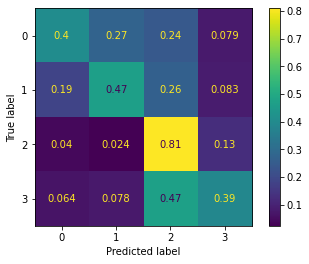

In [128]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, normalize = 'true')

In [233]:
import imblearn
from imblearn.over_sampling import SMOTE

In [234]:
sm = SMOTE(random_state=42, sampling_strategy = 'all')
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [235]:
Y_train.value_counts()

Metier_encoded
2                 2903
1                 1738
0                 1590
3                  928
dtype: int64

In [236]:
Y_res.value_counts()

Metier_encoded
0                 2903
1                 2903
2                 2903
3                 2903
dtype: int64

In [237]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100, random_state = 42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_res,Y_res)

y_pred2=clf2.predict(X_test)

C:\Users\YANHUQ~1\AppData\Local\Temp/ipykernel_11916/2261503128.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_res,Y_res)


In [238]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred2))

Accuracy: 0.5588604943443654


C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


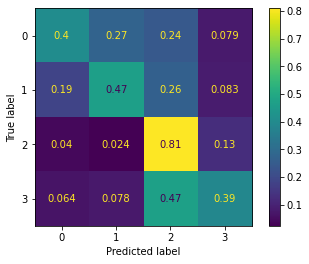

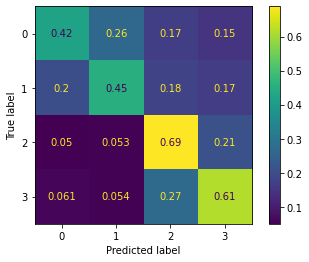

In [239]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, normalize = 'true')
plot_confusion_matrix(clf2, X_test, Y_test, normalize = 'true')

In [157]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=clf2, param_grid=param_grid, cv = 5, n_jobs = -1)
CV_rfc.fit(X_res, Y_res)

C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 23.5 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]})

In [158]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 500}

In [240]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clf3=RandomForestClassifier(random_state=42, 
                            criterion = 'gini',
                            max_depth = 8,
                            n_estimators = 500)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(X_res,Y_res)

y_pred3=clf3.predict(X_test)

C:\Users\YANHUQ~1\AppData\Local\Temp/ipykernel_11916/1603558741.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_res,Y_res)


In [244]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred3))

Accuracy: 0.576036866359447


In [149]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid2 = { 'bootstrap': [True],
             'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2,3,4,5],
             'n_estimators': [200, 400, 500, 600, 800, 1000, 1500, 2000],
              'criterion' :['gini']
}

CV_rfc2 = GridSearchCV(estimator=clf2, param_grid=param_grid2, cv = 5, n_jobs = -1)
CV_rfc2.fit(X_res, Y_res)

C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Wall time: 3h 21min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 400, 500, 600, 800, 1000, 1500,
                                          2000]})

In [150]:
CV_rfc2.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1500}

In [241]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


best_param = {'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1500}

#Create a Gaussian Classifier
clf4=RandomForestClassifier(random_state=42, bootstrap = True,
                            criterion = 'gini',
                            max_depth = 15,
                            max_features = 'auto',
                            min_samples_leaf = 1,
                            min_samples_split = 5,
                            n_estimators = 1500)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf4.fit(X_res,Y_res)

y_pred4=clf4.predict(X_test)

C:\Users\YANHUQ~1\AppData\Local\Temp/ipykernel_11916/1341609047.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf4.fit(X_res,Y_res)
C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [242]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred4))

Accuracy: 0.5693338919145371


C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yan HUQUET\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the cl

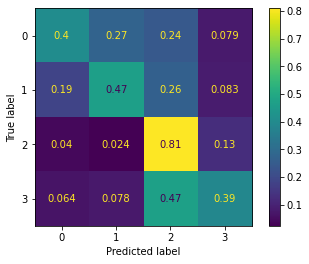

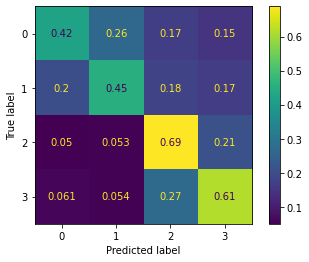

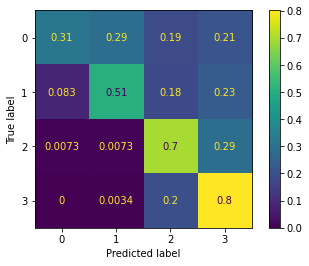

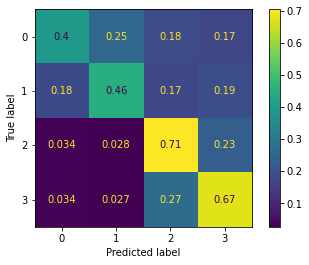

In [243]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, normalize = 'true')
plot_confusion_matrix(clf2, X_test, Y_test, normalize = 'true')
plot_confusion_matrix(clf3, X_test, Y_test, normalize = 'true')
plot_confusion_matrix(clf4, X_test, Y_test, normalize = 'true')

Après avoir créer le modèle, on va pouvoir l'appliquer à notre échantillon à prédire.

In [246]:
filtre = (data.Metier.isnull()) 
data3 = data[filtre]

In [247]:
data3.head()

Entreprise Metier  \
346                  Jacobs    NaN   
2058         Ball Aerospace    NaN   
2670             eHire, LLC    NaN   
2899  Norfolk Southern Corp    NaN   
3346  J.E. Ranta Associates    NaN   

                                        Technologies     Diplome  Experience  \
346                           Python/Spark/GNU/Linux  No diploma         2.5   
2058                              VBA/Python/Excel/R      Master        15.0   
2670                             Java/C/C++/R/Python      Master         1.5   
2899  Python/Tensorflow/scikit-learn/Deep learning/R         Phd         0.0   
3346                     Cassandra/MongoDB/NoSQL/AWS      Master         7.0   

         Ville Exp_label Technologies_2  Entreprise_encoded  Diplome_encoded  \
346      Paris  Confirmé         Python                 688                2   
2058      Lyon    Expert         Python                 157                1   
2670  Toulouse  Débutant         Python                1368                1   
2899  Grenoble  Débutant         Python                 886                3   
3346    Rennes    Avancé        MongoDB                 682                1   

      Ville_encoded  Technologies_2_encoded  Metier_encoded  CAH  \
346               8                       4               4    0   
2058              3                       4               4    0   
2670             13                       4               4    0   
2899              1                       4               4    1   
3346              9                       3               4    0   

      Ville_encoded_2  Technologies_encoded_2  CAH2  CAH3  \
346                 0                       0     0     0   
2058                1                       0     1     0   
2670                2                       0     0     0   
2899                3                       0     0     1   
3346                3                       5     0     0   

      Technologies_encoded_3  
346                        0  
2058                       0  
2670                       0  
2899                       0  
3346                       1

In [248]:
x1 = data3[["Experience", "Diplome_encoded", "Ville_encoded", "Technologies_2_encoded"]]
y1 = data3[["Metier_encoded"]]

In [249]:
y1_pred=clf4.predict(x1)

In [250]:
y1_pred

array([1, 1, 2, 2, 1, 2, 2, 3, 0, 3, 0, 2, 0, 2, 3, 2, 0, 1, 3])

In [251]:
le.inverse_transform(y1_pred)

array(['Data engineer', 'Data engineer', 'Data scientist',
       'Data scientist', 'Data engineer', 'Data scientist',
       'Data scientist', 'Lead data scientist', 'Data architecte',
       'Lead data scientist', 'Data architecte', 'Data scientist',
       'Data architecte', 'Data scientist', 'Lead data scientist',
       'Data scientist', 'Data architecte', 'Data engineer',
       'Lead data scientist'], dtype=object)

In [252]:
data4 = pd.DataFrame(le.inverse_transform(y1_pred))

In [253]:
data4

0
0         Data engineer
1         Data engineer
2        Data scientist
3        Data scientist
4         Data engineer
5        Data scientist
6        Data scientist
7   Lead data scientist
8       Data architecte
9   Lead data scientist
10      Data architecte
11       Data scientist
12      Data architecte
13       Data scientist
14  Lead data scientist
15       Data scientist
16      Data architecte
17        Data engineer
18  Lead data scientist

In [254]:
data3["Metier"] = data4.values

C:\Users\YANHUQ~1\AppData\Local\Temp/ipykernel_11916/3849730176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Metier"] = data4.values


In [255]:
data3

Entreprise               Metier  \
346                       Jacobs        Data engineer   
2058              Ball Aerospace        Data engineer   
2670                  eHire, LLC       Data scientist   
2899       Norfolk Southern Corp       Data scientist   
3346       J.E. Ranta Associates        Data engineer   
4248                        KPMG       Data scientist   
4290         Pandora Media, Inc.       Data scientist   
4292    Partners HealthCare(PHS)  Lead data scientist   
5425           Ashton Lane Group      Data architecte   
5593     Lighthouse Lab Services  Lead data scientist   
5712              Ball Aerospace      Data architecte   
6024                      Leidos       Data scientist   
6625              Ball Aerospace      Data architecte   
7091                        KPMG       Data scientist   
7228  Environmental Defense Fund  Lead data scientist   
7330                      Turner       Data scientist   
9087   Klein Hersh International      Data architecte   
9427          McKinsey & Company        Data engineer   
9490                     Pearson  Lead data scientist   

                                           Technologies     Diplome  \
346                              Python/Spark/GNU/Linux  No diploma   
2058                                 VBA/Python/Excel/R      Master   
2670                                Java/C/C++/R/Python      Master   
2899     Python/Tensorflow/scikit-learn/Deep learning/R         Phd   
3346                        Cassandra/MongoDB/NoSQL/AWS      Master   
4248                       Python/Microsoft Azure/R/SQL         Phd   
4290  SAS/Teradata/SQL/R/Python/Machine learning/Ang...         Phd   
4292  SAS/Teradata/SQL/R/Python/Machine learning/Ang...      Master   
5425                               Python/Pyspark/Spark  No diploma   
5593            Python/R/machine learning/Excel/VBA/C++      Master   
5712                        Hadoop/Hive/Vertica/Tableau    Bachelor   
6024                      Linux/Python/Hadoop/Perl/Ruby      Master   
6625                        Hadoop/Hive/Vertica/Tableau  No diploma   
7091  SAS/Teradata/SQL/R/Python/Machine learning/Ang...      Master   
7228         Map-Reduce/HDFS/PIG/HBASE/Python/Cassandra      Master   
7330     Excel/Python/Matlab/R/machine learning/anglais         Phd   
9087                        Hadoop/Hive/Vertica/Tableau  No diploma   
9427            Python/R/machine learning/Excel/VBA/C++      Master   
9490                     R/Python/Spark/Pycharm/SAS/SQL      Master   

      Experience      Ville Exp_label Technologies_2  Entreprise_encoded  \
346          2.5      Paris  Confirmé         Python                 688   
2058        15.0       Lyon    Expert         Python                 157   
2670         1.5   Toulouse  Débutant         Python                1368   
2899         0.0   Grenoble  Débutant         Python                 886   
3346         7.0     Rennes    Avancé        MongoDB                 682   
4248         2.0       Lyon  Débutant         Python                 704   
4290         1.5   Toulouse  Débutant         Python                 943   
4292         8.0   Bordeaux    Avancé         Python                 948   
5425         5.0       Lyon  Confirmé         Python                 124   
5593         3.0       Lyon  Confirmé         Python                 753   
5712         3.0      Paris  Confirmé         Hadoop                 157   
6024         1.5       Lyon  Débutant         Python                 743   
6625         0.0      Paris  Débutant         Hadoop                 157   
7091         0.0  Marseille  Débutant         Python                 704   
7228         2.5   Bordeaux  Confirmé         Python                 455   
7330         0.5       Lyon  Débutant         Python                1247   
9087         3.5      Paris  Confirmé         Hadoop                 718   
9427         1.0  Marseille  Débutant         Python                 803   
9490         4.0

Les résultats semblent cohérents en terme de prédiction.